In [1]:
from pathlib import Path, PurePath
from collections import Counter
import re
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

filtered_tables = list(Path("../filteredData").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables))


num of tables: 519107


In [2]:
allowed_labels = Path("./allowedLabels.txt").read_text().lower().split("\n")

In [3]:
class DataCounter:
    def __init__(self, paths):
        self.labels_counter = Counter()
        self.width_counter = Counter()

        for path in paths:
            with open(path) as file:
                labels = file.readline().replace("\n", "").split("|")

            for label in labels:
                self.labels_counter[label] += 1

            self.width_counter[len(labels)] += 1

dc = DataCounter(filtered_tables)

In [39]:
def print_labels(dc: DataCounter, top: int, ignore_allowed=False):
    pairs = dc.labels_counter.most_common(top)
    for (x, y) in pairs:
        if ignore_allowed and x.lower() in allowed_labels:
            continue
        print(x, y)

In [21]:
def print_widths(dc: DataCounter):
    pairs = dc.width_counter.most_common(50)
    for (x, y) in pairs:
        print(f"widht: {x}, num: {y}")

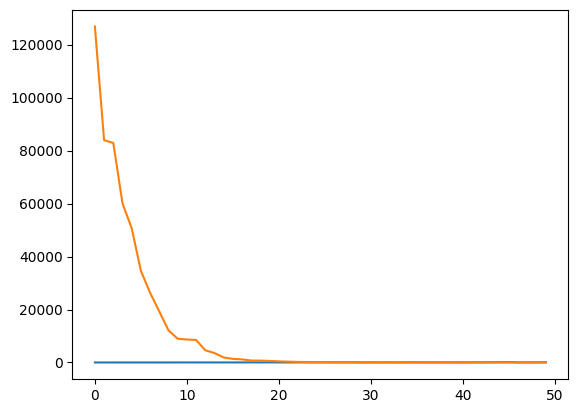

In [26]:
plt.plot(dc.width_counter.most_common(50))

In [35]:
print_widths(dc)

widht: 2, num: 126854
widht: 4, num: 83934
widht: 3, num: 82885
widht: 5, num: 60058
widht: 6, num: 50684
widht: 7, num: 34567
widht: 8, num: 26303
widht: 1, num: 19232
widht: 9, num: 12108
widht: 10, num: 8954
widht: 13, num: 8675
widht: 11, num: 8502
widht: 12, num: 4618
widht: 14, num: 3549
widht: 15, num: 1884
widht: 17, num: 1362
widht: 16, num: 1171
widht: 45, num: 731
widht: 20, num: 707
widht: 43, num: 587
widht: 18, num: 422
widht: 19, num: 303
widht: 21, num: 217
widht: 31, num: 175
widht: 22, num: 147
widht: 23, num: 144
widht: 24, num: 106
widht: 29, num: 100
widht: 25, num: 98
widht: 26, num: 32
widht: 34, num: 30
widht: 30, num: 24
widht: 38, num: 21
widht: 28, num: 15
widht: 44, num: 12
widht: 41, num: 11
widht: 32, num: 10
widht: 33, num: 9
widht: 40, num: 8
widht: 36, num: 7
widht: 35, num: 5
widht: 49, num: 2
widht: 42, num: 2
widht: 80, num: 2
widht: 97, num: 1
widht: 128, num: 1
widht: 27, num: 1
widht: 46, num: 1
widht: 39, num: 1
widht: 85, num: 1


In [43]:
print_labels(dc, 10, ignore_allowed=True)

Результаты 67102
Рецензии 27201


### After filtrating out those tables that have unallowed labels 
---

In [46]:
filtered_tables2 = list(Path("../filteredData2").glob("./*/*.csv"))

print("num of tables:", len(filtered_tables2))

num of tables: 49706


In [33]:
dc2 = DataCounter(filtered_tables2)

In [41]:
print_labels(dc2, 10)

Роль 21343
Актёр 19269
Год 13333
Название 7126
Место 5000
Город 3819
Клуб 3121
Результат 2993
Спортсмен 2853
Имя 2733


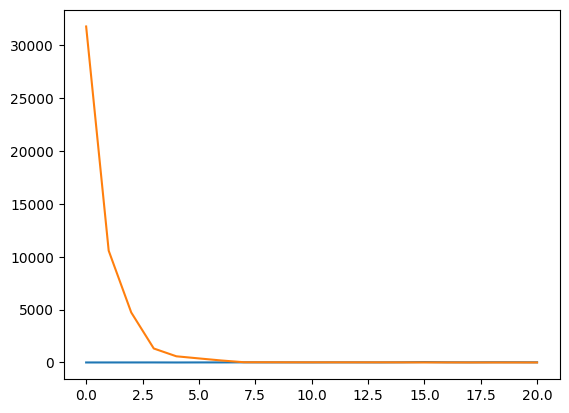

In [44]:
plt.plot(dc2.width_counter.most_common(50))

In [45]:
print_widths(dc2)

widht: 2, num: 31770
widht: 3, num: 10571
widht: 4, num: 4731
widht: 5, num: 1323
widht: 1, num: 586
widht: 6, num: 385
widht: 7, num: 189
widht: 14, num: 23
widht: 10, num: 23
widht: 11, num: 17
widht: 8, num: 16
widht: 13, num: 15
widht: 12, num: 14
widht: 9, num: 14
widht: 19, num: 10
widht: 41, num: 7
widht: 20, num: 5
widht: 15, num: 2
widht: 24, num: 2
widht: 23, num: 2
widht: 16, num: 1


***

In [9]:
num = np.random.randint(0, 30000)

print(filtered_tables2[num])
table = filtered_tables2[num]
pd.read_csv(table, delimiter="|")


../filteredData2/8518419/table_0.csv


,Актёр,Роль
0,Николай Граббе,Гиена-дедушка
1,Мария Виноградова,Гиена-бабушка
2,Всеволод Ларионов,Гиена-папа
3,Ирина Карташёва,Гиена-мама
4,Вячеслав Невинный,Гиена-дядя
5,Нина Гуляева,Гиена-тётя
6,А. Соловьёв,Гиена-сын
7,Лариса Удовиченко,Гиена-дочь
8,Ия Саввина,Гиена-просто гиена
9,Леонид Марков,Лев
